In [1]:
from config import *
config_chapter0()

# This is needed to render the plot
from plots.chapter0 import *

Finished!


In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import StandardScaler

# Visualizing Gradient Descent

# Model

$$
\Large y = b + w x + \epsilon 
$$

## Data Generation

### Synthetic Data Generation




In [3]:
np.random.rand(2, 1)

array([[0.20173078],
       [0.55202976]])

In [6]:
np.random.rand(1, 1)

array([[0.32519213]])

In [7]:
true_b = 1
true_w = 2
N = 100

# Data Generation
np.random.seed(42)
x = np.random.rand(N, 1)
epsilon = (.1 * np.random.randn(N, 1))
y = true_b + true_w * x + epsilon

## Train and Test Split

In [12]:
ten = np.arange(10)
ten

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
np.random.shuffle(ten)

In [14]:
ten

array([7, 5, 1, 4, 8, 6, 0, 9, 3, 2])

In [15]:
# Shuffle the indices
idx = np.arange(N)
np.random.shuffle(idx)

# Uses first 80 random indices for train
train_idx = idx[:int(N*.8)]
# Uses the remaining indices for validation
val_idx = idx[int(N*.8):]

# Generate train and validation set
x_train, y_train = x[train_idx], y[train_idx]
x_val, y_val = x[val_idx], y[val_idx]


In [16]:
val_idx

array([94, 88, 57, 53, 24, 17, 66, 32, 86, 31, 84, 62, 59, 52, 99, 92, 23,
       36,  5, 45])

(<Figure size 864x432 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fdfd73b7450>,
       dtype=object))

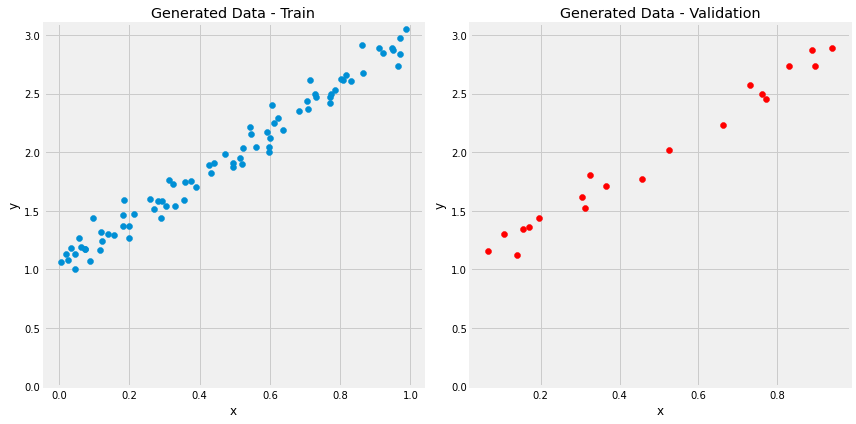

In [17]:
figure1(x_train, y_train, x_val, y_val)

## Step 0: Random Initialization

In [18]:
# Step 0: Initializex parameters "b" and "w" randomly
np.random.seed(42)
b = np.random.randn(1)
w = np.random.randn(1)

print(b, w)

[0.49671415] [-0.1382643]


## Step 1: Compute the Model's Prediction

In [19]:
# Step 1: Computer our model's predicted output - forward pass
yhat = b + w * x_train

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdfb8d4d890>)

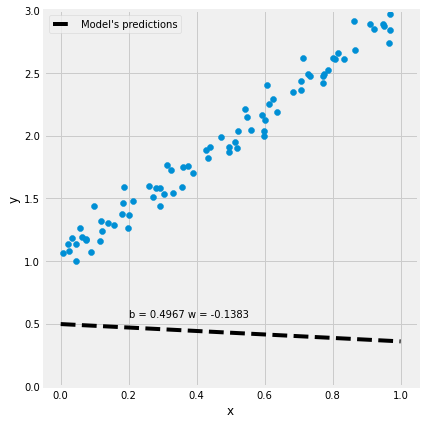

In [20]:
figure2(x_train, y_train, b, w)

## Step 2: Compute the Loss

$$
\Large error_i = \hat{y_i} - y_i
$$

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/usr/local/lib/python3.7/dist-packages/matplotlib/patches.py:1327: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  verts = np.dot(coords, M) + (x + dx, y + dy)


(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdfb8c608d0>)

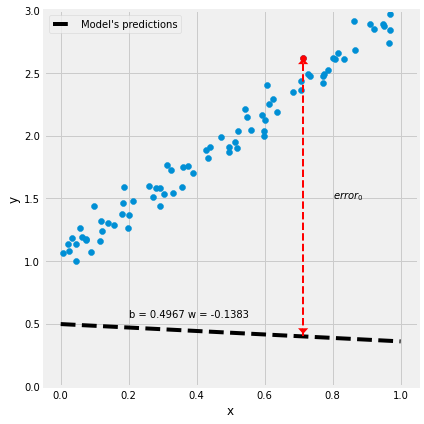

In [21]:
figure3(x_train, y_train, b, w)

$$
\Large
\begin{aligned}
MSE &= \frac{1}{n} \sum_{i=1}^n{error_i}^2
\\ 
&= \frac{1}{n} \sum_{i=1}^n{(\hat{y_i} - y_i)}^2 
\\ 
&= \frac{1}{n} \sum_{i=1}^n{(b + w x_i - y_i)}^2
\end{aligned}
$$

In [22]:
# Step 2: Computing the loss 
# we are using All data points, so this is BATCH gradient
# descent. How wrong is our model? That's the error!
error = (yhat - y_train)

# It is a regression, so it computes mean squared error (MSE)
loss = (error ** 2).mean()
print(loss)

2.6492796092142337


### Loss Surface

In [25]:
# Reminder:
# true_b = 1
# true_w = 2

# we have to split the ranges in 100 evenly spaced intervals each
b_range = np.linspace(true_b - 3, true_b + 3, 101)
w_range = np.linspace(true_w - 3 , true_w + 3, 101)

# meshgrid is a handy function that generates a grid of b and w 
# values of all combinations
bs, ws = np.meshgrid(b_range, w_range)
bs.shape, ws.shape

((101, 101), (101, 101))

In [24]:
yhat.shape

(80, 1)

In [26]:
bs

array([[-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       ...,
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ],
       [-2.  , -1.94, -1.88, ...,  3.88,  3.94,  4.  ]])

In [27]:
sample_x = x_train[0]
sample_yhat = bs + ws * sample_x 
sample_yhat.shape

(101, 101)

In [28]:
all_predictions = np.apply_along_axis(
    func1d = lambda x: bs + ws * x, 
    axis = 1,
    arr = x_train
)

all_predictions.shape

(80, 101, 101)

In [30]:
all_labels = y_train.reshape(-1, 1, 1)
all_labels.shape

(80, 1, 1)

In [31]:
all_errors = (all_predictions - all_labels)
all_errors.shape

(80, 101, 101)

In [33]:
all_losses = (all_errors ** 2).mean(axis=0)
all_losses.shape

(101, 101)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


(<Figure size 864x432 with 2 Axes>,
 (<matplotlib.axes._subplots.Axes3DSubplot at 0x7fdfb8b4af50>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fdfb8b43fd0>))

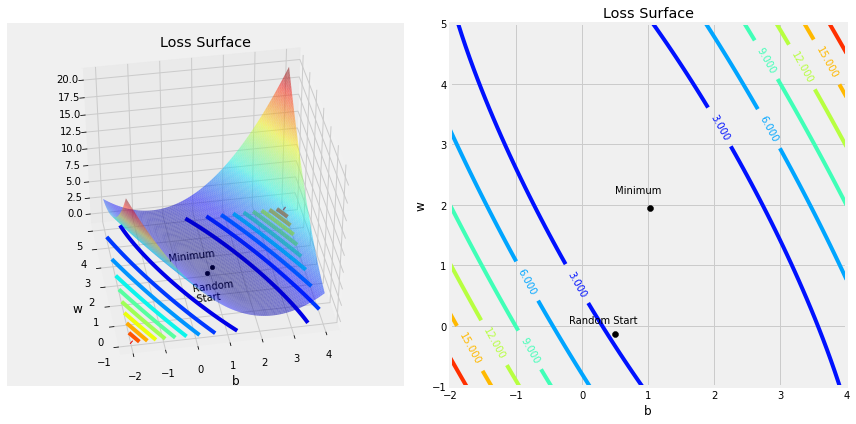

In [34]:
figure4(x_train, y_train, b, w, bs, ws, all_losses)